In [23]:
from PIL import Image
import PIL.ExifTags
from os.path import join
import numpy as np
import cv2 
import matplotlib.pyplot as plt 

In [50]:
root_dir = r'C:\Users\E-ITX\Documents\AMS-SCBGP_Sweetpotato_SystemExperiments\CameraConfigurations\2LEDs'
path = join(root_dir, 'config2', '1_Color.png')
img = Image.open(path)
exif_data = img._getexif()
print(exif_data)
# exif = {
# PIL.ExifTags.TAGS[k]: v
# for k, v in img._getexif().items()
# if k in PIL.ExifTags.TAGS
# }

None


In [51]:
import json
path = join(root_dir, 'config2', '1_Color.json')
with open(path, 'r') as f:
    txt = json.load(f)
contours = []
labels = []
for shape in txt['shapes']:
    labels.append(shape['label'])
    item = np.array(shape['points']).reshape(-1, 1, 2)
    item = np.round(item).astype(np.int)
    contours.append(item)
len(contours)

C:\Users\E-ITX\AppData\Local\Temp\ipykernel_4308\857490474.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  item = np.round(item).astype(np.int)


5

C:\Users\E-ITX\AppData\Local\Temp\ipykernel_4308\799269498.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


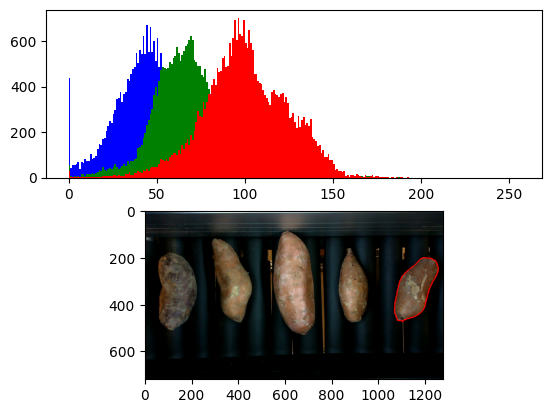

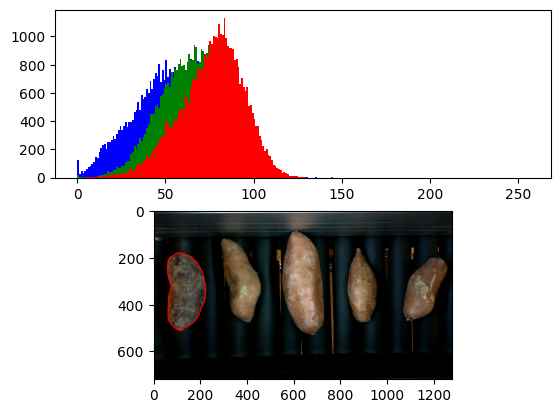

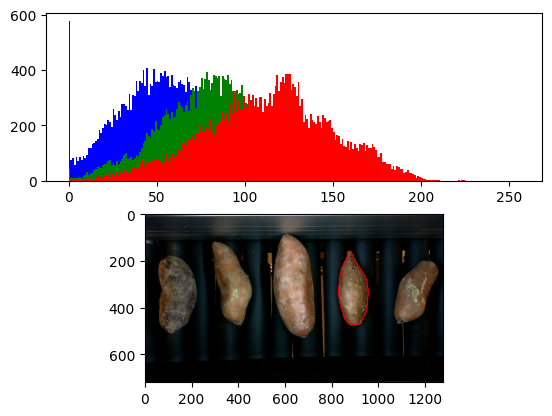

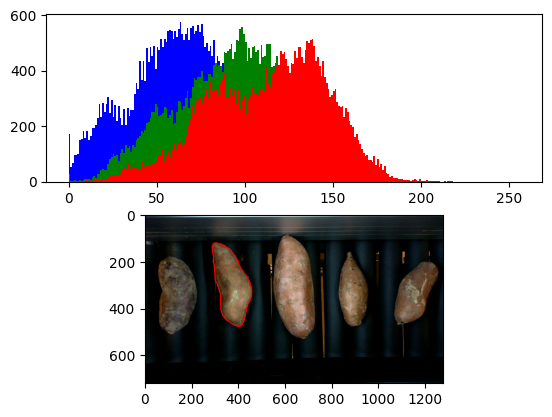

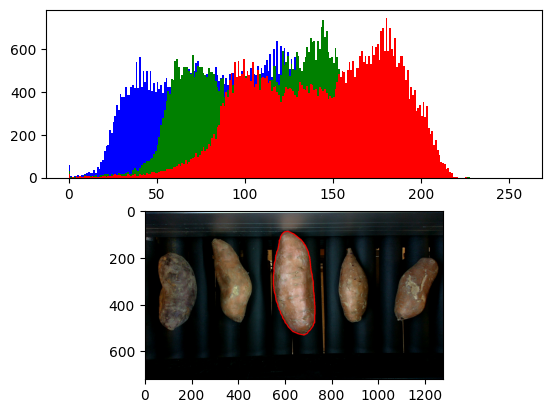

In [52]:
img = np.array(img)

for i_idx, contour in enumerate(contours):
    img_show = img.copy()
    contour = contours[i_idx]
    mask = np.zeros_like(img)
    cv2.drawContours(mask, [contour], -1, 255,-1)
    cv2.drawContours(img_show, [contour], -1, 255,3)
    pts  = np.where(mask == 255)
    roi = img[pts[0], pts[1]]

    plt.title(f"Histogram of {i_idx}") 
    plt.subplot(2, 1, 1) 
    plt.hist(roi[:, 2], color="blue", bins=256, range=(0,256)) 
    # plt.hist(roi[2], color="blue", bins=256, range=(roi[2].min(),roi[0].max())) 
    plt.hist(roi[:, 1], color="green", bins=256, range=(0,256)) 
    plt.hist(roi[:, 0], color="red", bins=256, range=(0,256)) 
    plt.subplot(2, 1, 2) 
    plt.imshow(img_show)
    plt.show() 

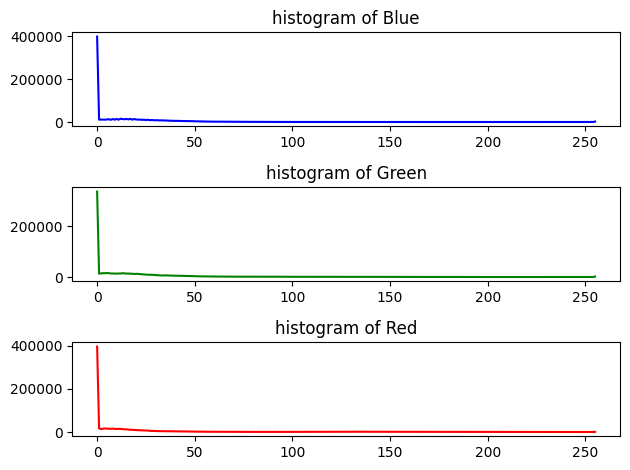

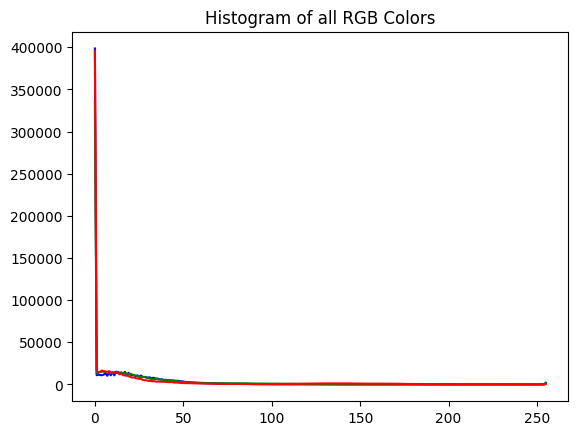

In [16]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt 

# img = np.array(img)
imageObj = img
# Get RGB data from image 
red_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256]) 
green_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256]) 
blue_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256]) 
  
# red_color = img[:, :, 0]
# green_color = img[:, :, 1]
# blue_color =  img[:, :, 2]
# Separate Histograms for each color 
plt.subplot(3, 1, 1) 
plt.title("histogram of Blue") 
plt.plot(blue_color, color="blue") 
  
plt.subplot(3, 1, 2) 
plt.title("histogram of Green") 
plt.plot(green_color, color="green") 
  
plt.subplot(3, 1, 3) 
plt.title("histogram of Red") 
plt.plot(red_color, color="red") 
  
# for clear view 
plt.tight_layout() 
plt.show() 
  
# combined histogram 
plt.title("Histogram of all RGB Colors") 
plt.plot(blue_color, color="blue") 
plt.plot(green_color, color="green") 
plt.plot(red_color, color="red") 
plt.show() 